In [1]:
from _utils import PhotoScripts as PS
from astropy import units as u

In [2]:
working_bands = ['f090w', 'f150w', 'f200w', 'f277w', 'f356w', 'f410m', 'f444w'] # Sempre quelle so'

galaxy_name = '956337' # Bella, cicciotta, come test ci sta
mask_ra, mask_dec, mask_radius = 150.187625*u.deg, 2.3224552*u.deg, 3.*u.arcsec

map_tuple, errormap_tuple = PS.reduce_maps(galaxy_name, working_bands)

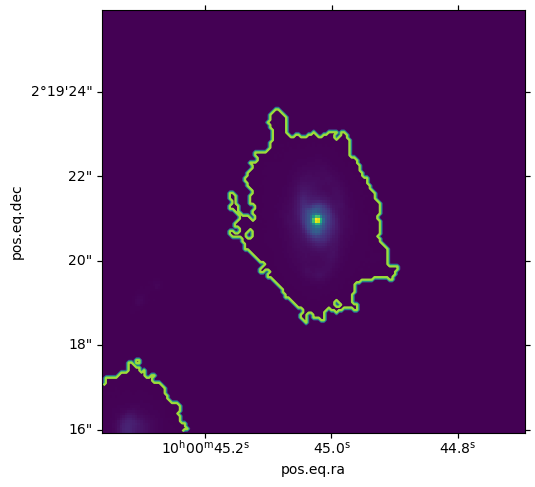

In [5]:
segmap = PS.segmentation_map(map_tuple, errormap_tuple, plot_segm = True)

In [6]:
df = PS.build_photometry(galaxy_name, map_tuple, errormap_tuple, working_bands, \
                         is_segmented = True, segmentation_map = segmap, \
                         masking = True, mask_ra = mask_ra, mask_dec = mask_dec, mask_radius = mask_radius)

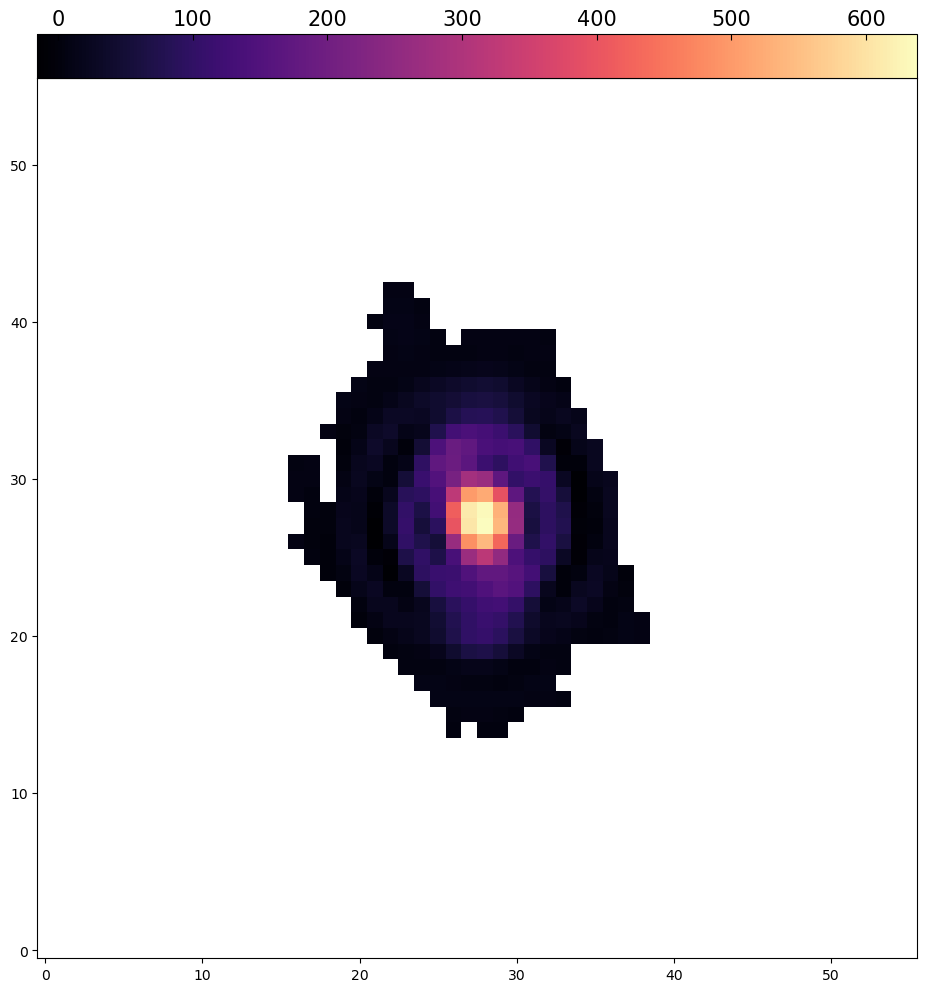

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes
 
working_bands = ['f090w', 'f150w', 'f200w', 'f277w', 'f356w', 'f410m', 'f444w'] # Sempre quelle so'

band = 'f444w'
SNR = (df[band]/df[band+'_err'])

f444w = np.zeros((56, 56))
f444w[f444w == 0] = np.nan
f444w[df.PIX_Y.astype('int').values, df.PIX_X.astype('int').values] = SNR

fig = plt.figure(figsize = (12, 12))
ax = plt.subplot(111)
im = ax.imshow(f444w, origin = 'lower', cmap = cm.magma, interpolation = 'nearest')
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", axes_class=maxes.Axes, pad=0.0)
cax.tick_params(direction='in') 
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.outline.set_edgecolor('black')
cax.xaxis.set_ticks_position('top')
cax.tick_params(axis='both', which='major', length = 4.0, labelsize=15)